In [17]:
import sys
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib
matplotlib.use('Agg')

from Model import classification_head
from numpy import array
from PIL import ImageOps, Image

WEIGHTS_FILE = "classifier.ckpt"
SIZE = (32,32)

def detect_single(img_path, saved_model_weights,sess):
    fit_and_resized_image = ImageOps.fit(img_path, SIZE, Image.ANTIALIAS)

    X = tf.placeholder(tf.float32, shape=(1, 32, 32, 3))
    prediction = tf.nn.softmax(classification_head(X))

    pix = np.array(fit_and_resized_image)
    norm_img = (255-pix)*1.0/255.0
    exp = np.expand_dims(norm_img, axis=0)

    feed_dat = {X: exp}
    predictions = sess.run(prediction, feed_dict=feed_dat)
    # print("Best Prediction is:", np.argmax(predictions))
    return np.argmax(predictions), norm_img

Populating the interactive namespace from numpy and matplotlib
INFO:tensorflow:Restoring parameters from classifier.ckpt
Not using dropout


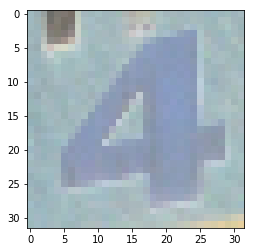

BEST PREDICTION IS: 1
Not using dropout


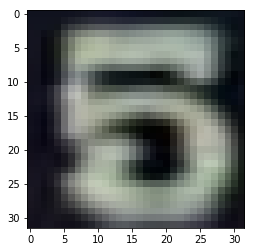

BEST PREDICTION IS: 5


In [18]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import glob

image_list = []
saved_model_weights = WEIGHTS_FILE
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, saved_model_weights)
    for filename in glob.glob('Single_Digit_Test/*.png'):
        print("==================================================================================================")
        print("==================================================================================================")
        im=Image.open(filename)
        image_list.append(im)
        prediction, test_img = detect_single(im, saved_model_weights,sess)
        plt.figure()
        imgplot = plt.imshow(test_img)
        plt.show()
        print("BEST PREDICTION IS:", prediction)
        print("==================================================================================================")
        print("==================================================================================================")

In [19]:
import matplotlib
matplotlib.use('Agg')

import sys
import os
import numpy as np
import tensorflow as tf
import PIL.Image as Image
import matplotlib.pyplot as plt
import time

from Model import regression_head
from svhn_data import load_svhn_data
from PIL import ImageOps, Image
from tensorflow.python.saved_model import tag_constants
from six.moves import cPickle as pickle
from six.moves import range

test_dataset, test_labels = load_svhn_data("test", "full")
WEIGHTS_FILE = "regression.ckpt"
SIZE = (64,64)

def prediction_to_string(pred_array):
    pred_str = ""
    for i in range(len(pred_array)):
        if pred_array[i] != 10:
            pred_str += str(pred_array[i])
        else:
            return pred_str
    return pred_str


def detect_multi(img_path, saved_model_weights ,session):

    print("-------------------Attemped resize img------------------------------")    
    fit_and_resized_image = ImageOps.fit(img_path, SIZE, Image.ANTIALIAS)
    pix = np.array(fit_and_resized_image)
    norm_pix = (255-pix)*1.0/255.0
    exp = np.expand_dims(norm_pix, axis=0)

    X = tf.placeholder(tf.float32, shape=(1, 64, 64, 3))
    [logits_1, logits_2, logits_3, logits_4, logits_5] = regression_head(X)

    predict = tf.stack([tf.nn.softmax(logits_1),
                      tf.nn.softmax(logits_2),
                      tf.nn.softmax(logits_3),
                      tf.nn.softmax(logits_4),
                      tf.nn.softmax(logits_5)])

    best_prediction = tf.transpose(tf.argmax(predict, 2))
    feed_dict = {X: exp}
    start_time = time.time()
    predictions = session.run(best_prediction, feed_dict=feed_dict)
    pred = prediction_to_string(predictions[0])
    end_time = time.time()
    return pred, norm_pix

Populating the interactive namespace from numpy and matplotlib
INFO:tensorflow:Restoring parameters from regression.ckpt
-------------------Attemped resize img------------------------------


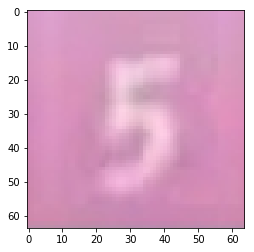

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


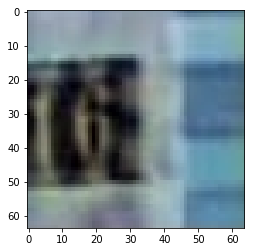

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


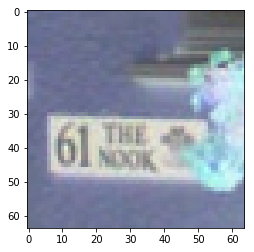

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


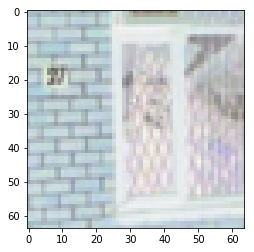

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


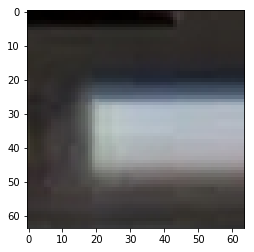

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


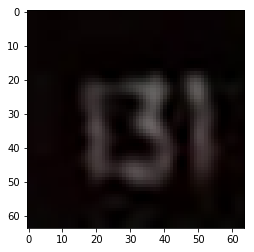

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


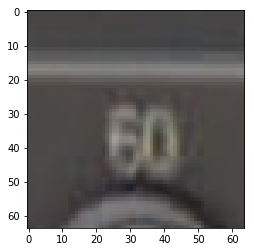

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


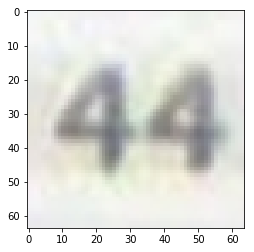

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


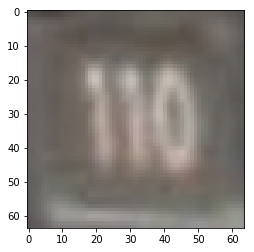

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


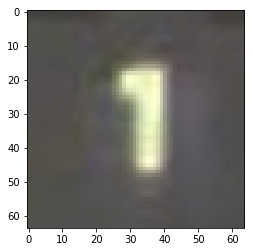

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


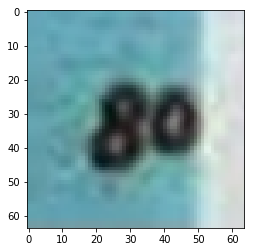

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


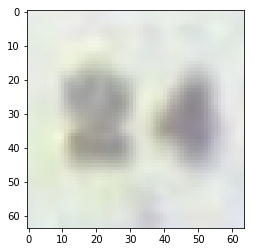

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


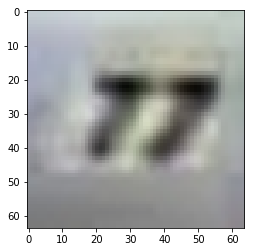

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


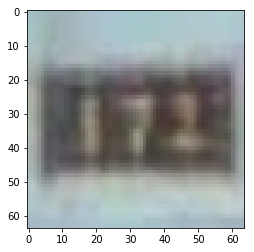

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


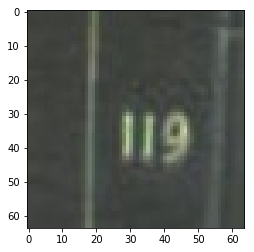

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


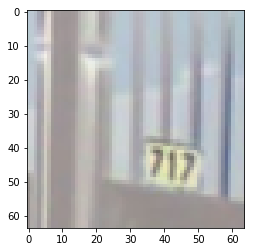

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


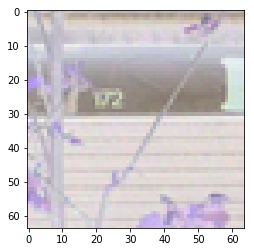

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


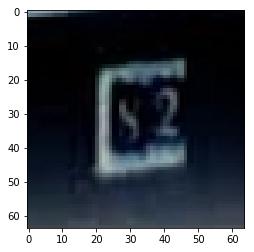

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


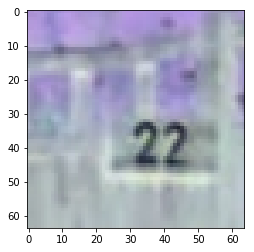

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


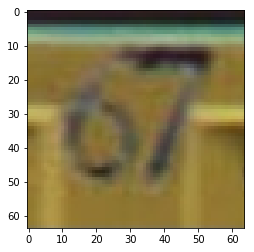

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


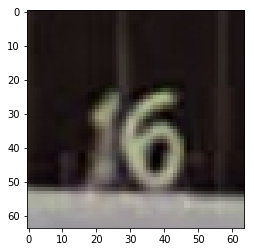

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


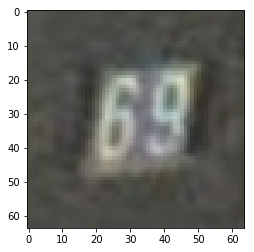

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


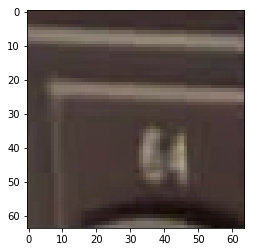

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


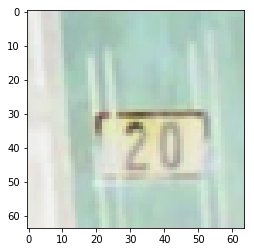

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


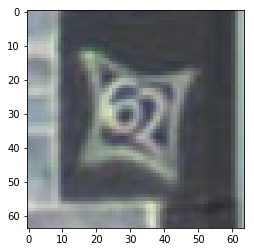

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


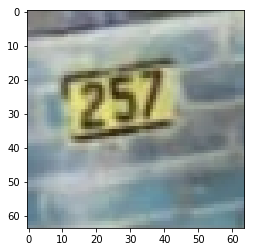

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


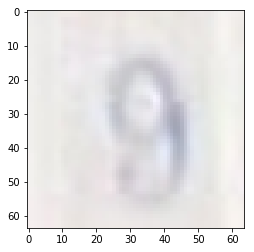

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


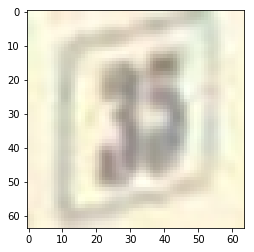

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


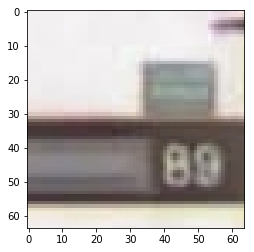

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


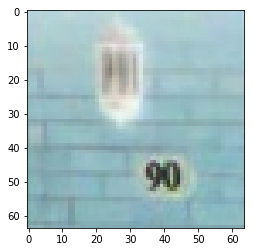

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


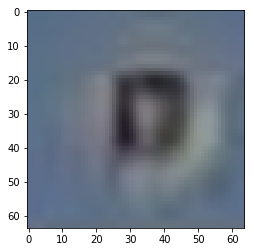

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


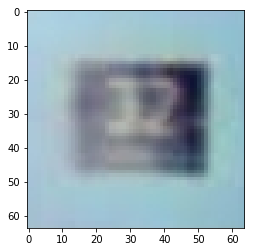

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


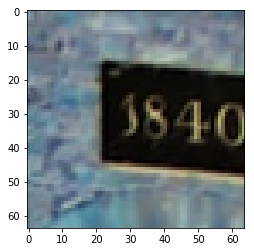

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


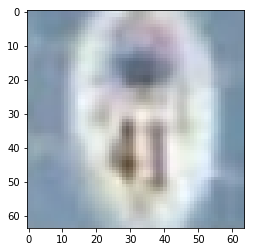

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


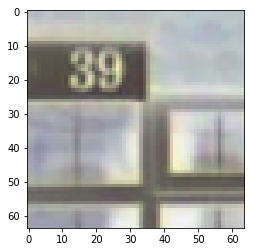

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


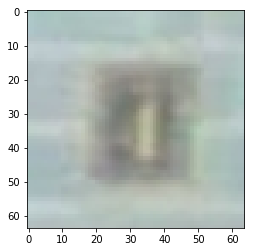

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


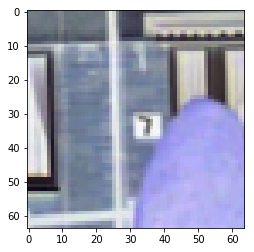

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


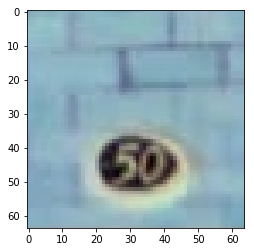

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


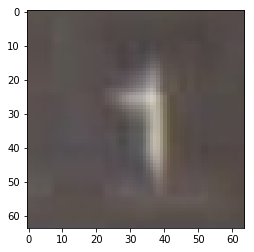

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


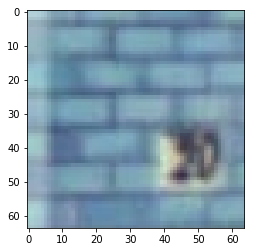

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


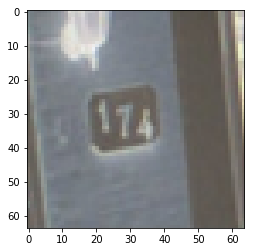

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


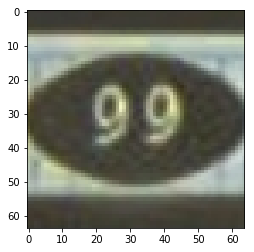

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


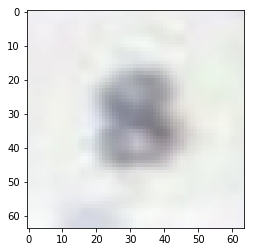

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


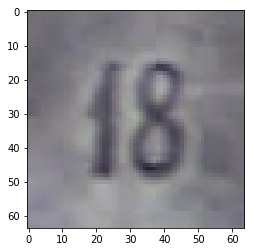

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


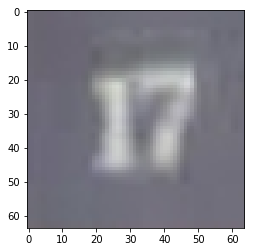

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


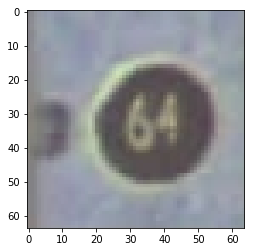

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


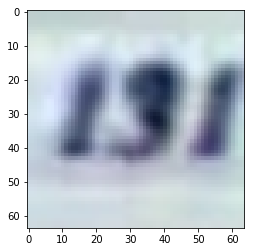

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


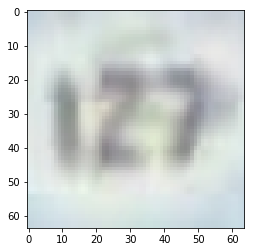

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


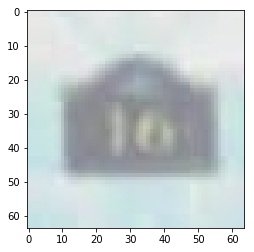

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


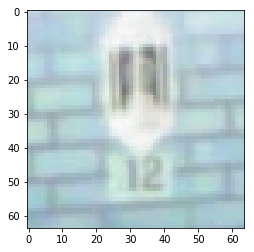

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


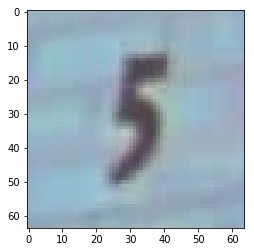

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


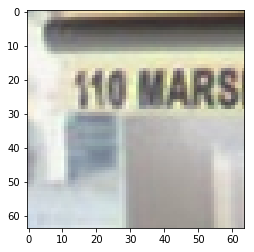

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


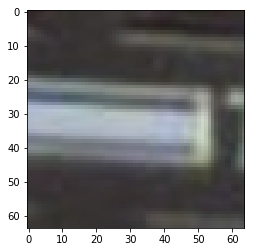

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


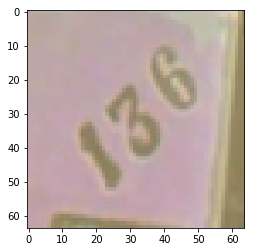

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


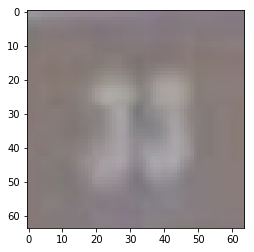

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


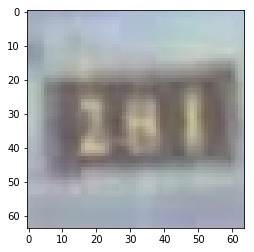

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


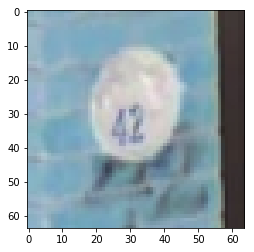

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


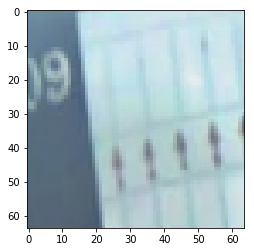

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


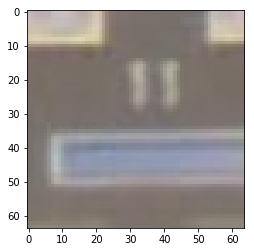

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


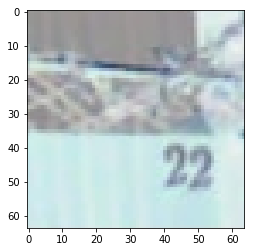

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


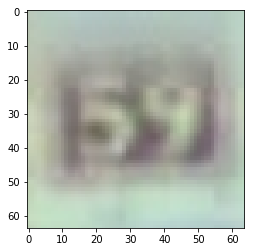

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


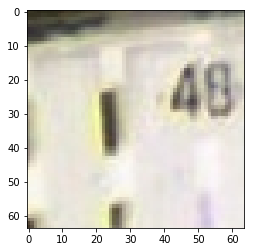

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


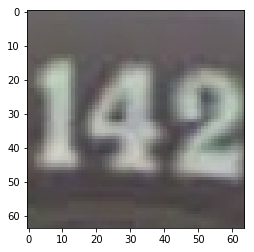

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


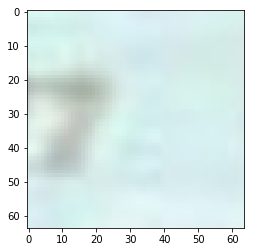

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


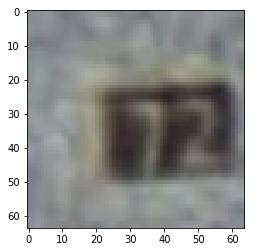

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


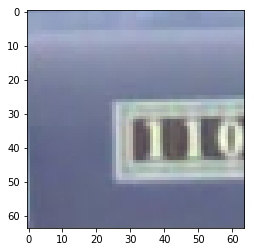

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


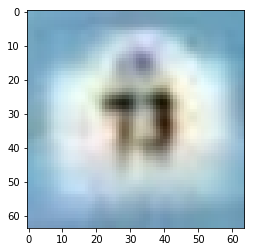

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


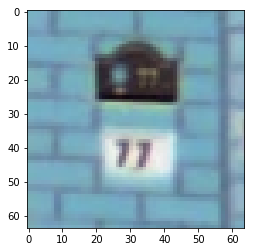

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


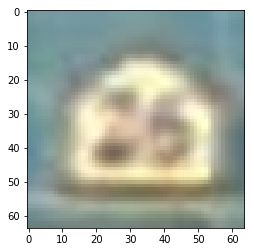

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


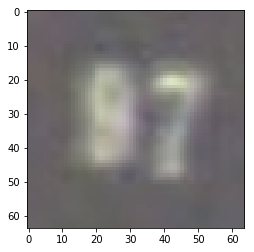

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


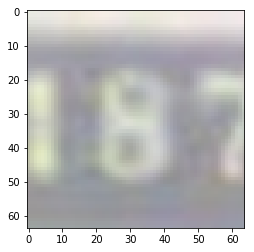

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


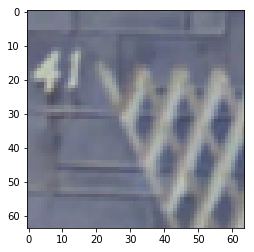

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


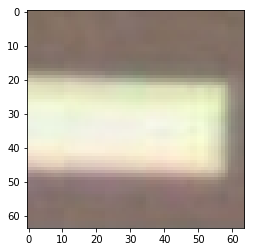

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


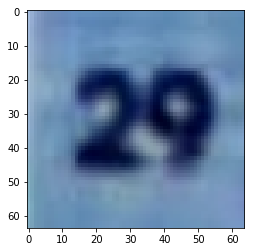

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


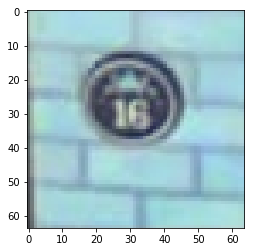

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


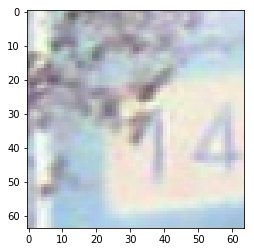

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


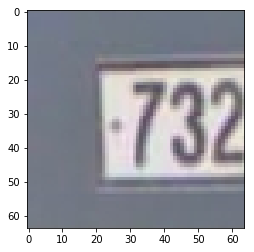

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


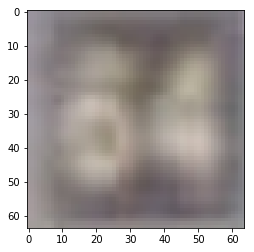

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


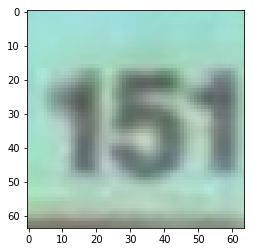

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


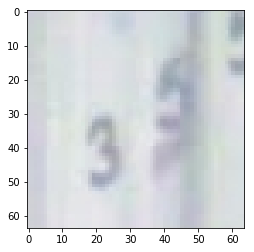

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


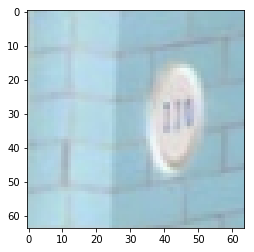

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


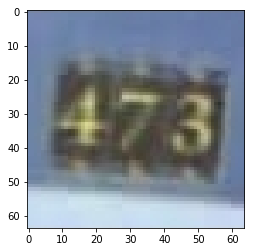

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


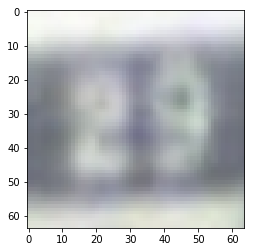

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


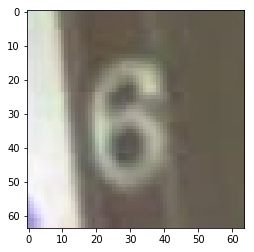

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


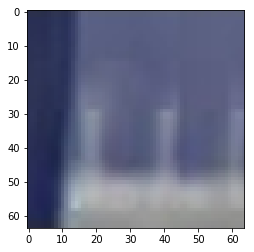

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


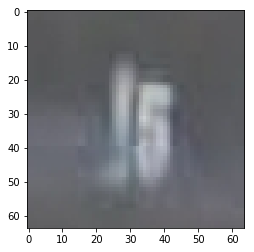

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


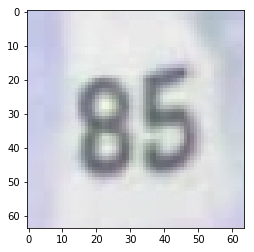

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


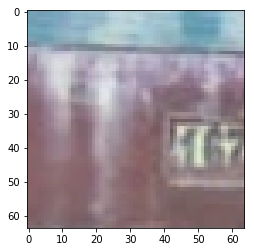

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


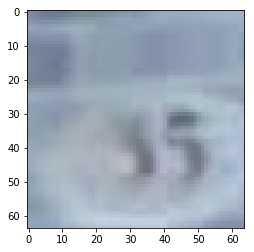

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


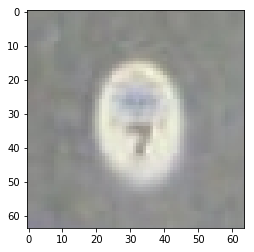

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


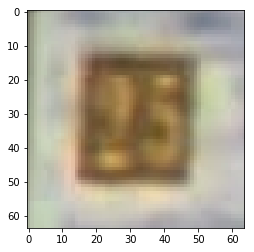

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


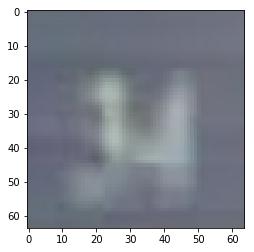

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


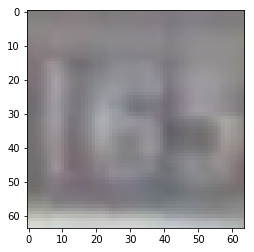

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


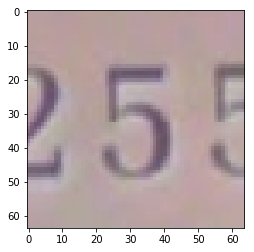

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


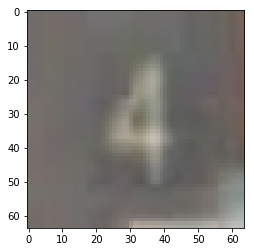

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


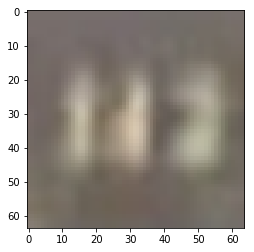

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


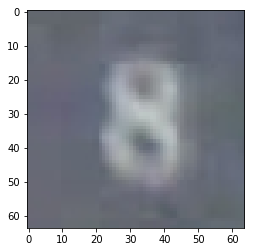

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


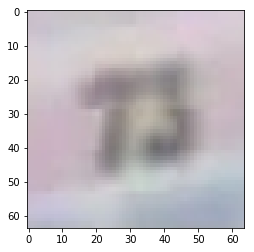

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


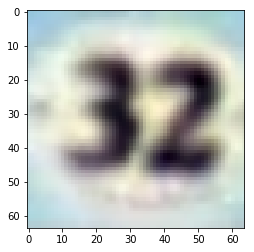

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


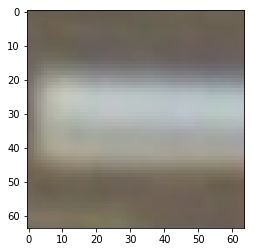

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


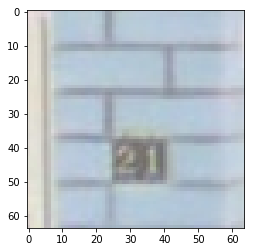

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


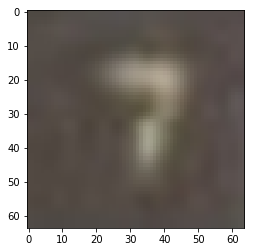

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


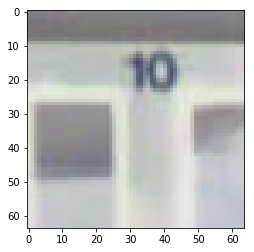

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


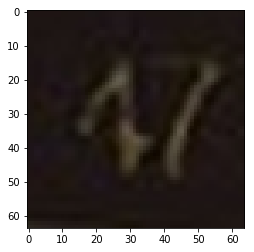

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


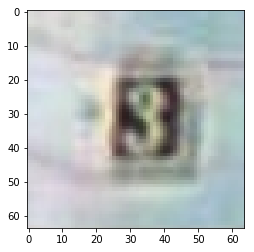

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


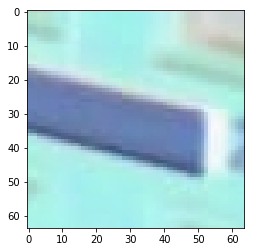

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


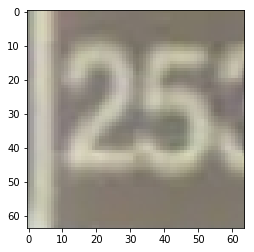

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


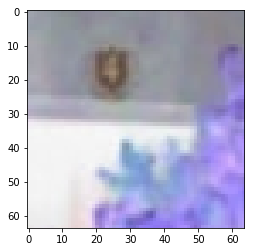

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


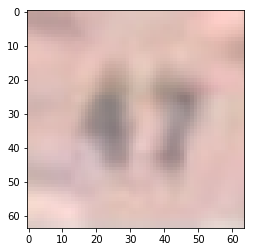

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


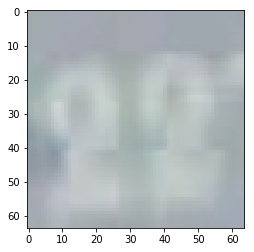

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


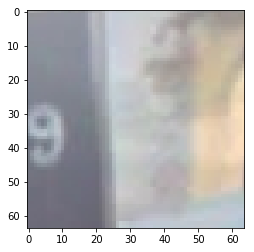

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


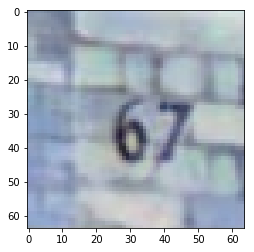

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


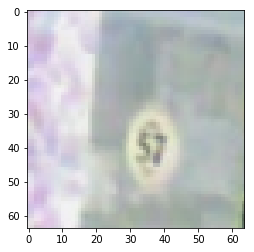

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


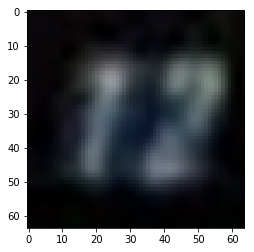

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


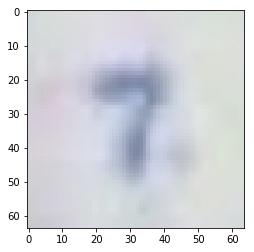

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


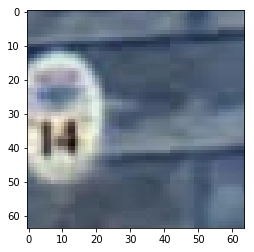

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


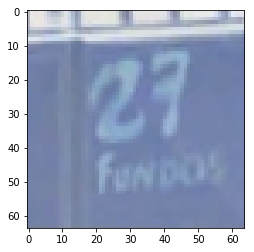

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


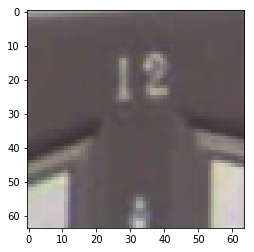

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


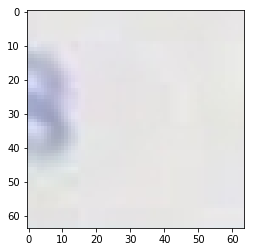

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


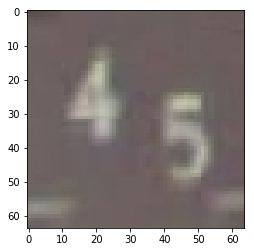

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


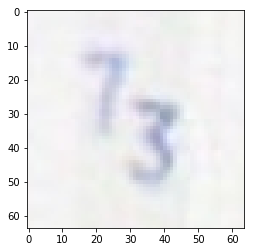

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


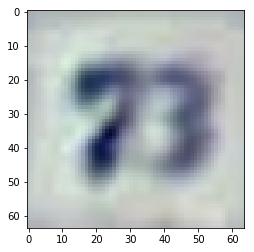

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


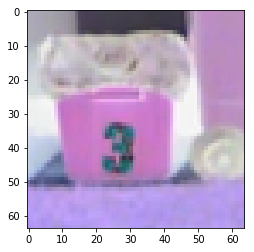

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


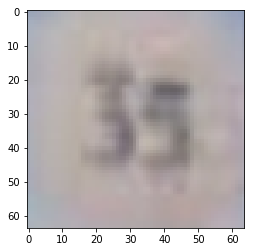

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


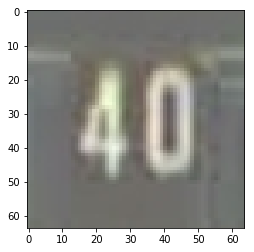

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


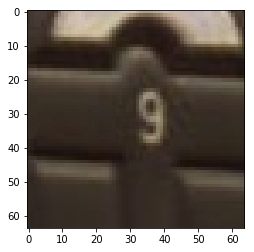

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


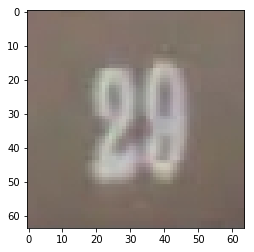

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


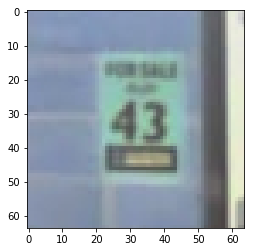

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


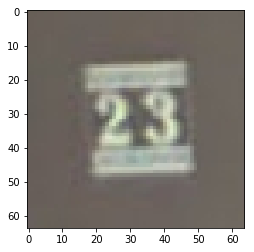

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


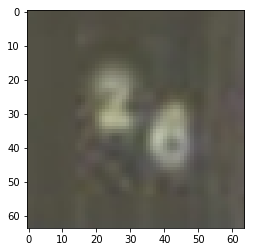

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


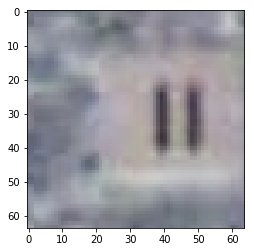

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


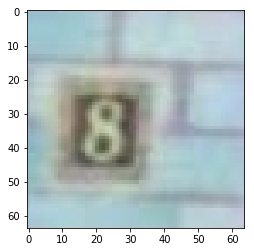

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


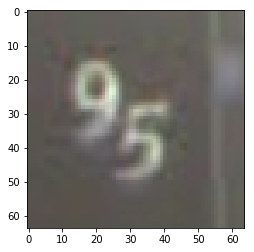

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


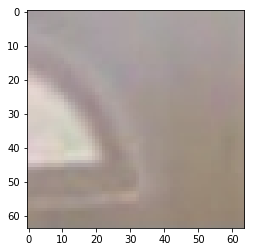

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


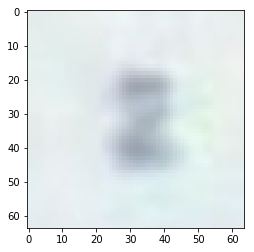

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


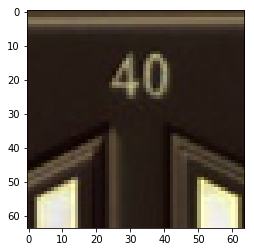

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


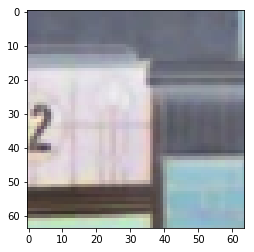

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


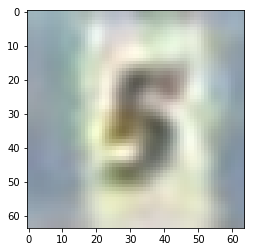

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


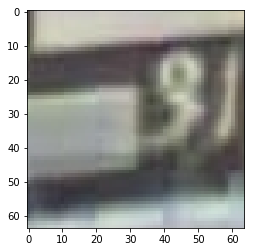

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


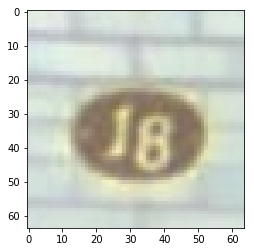

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


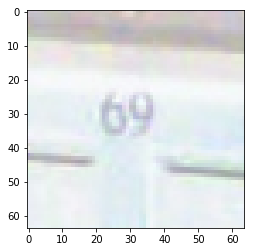

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


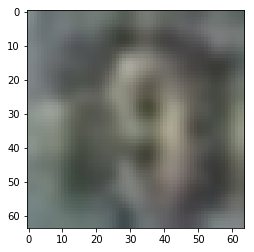

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


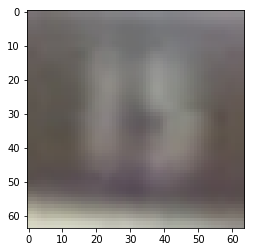

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


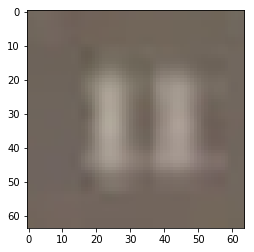

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


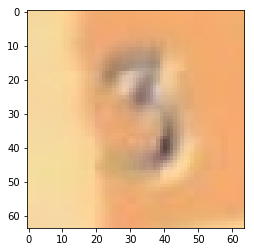

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


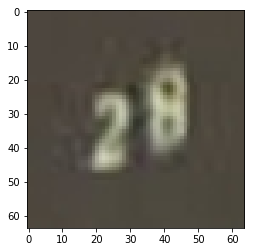

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


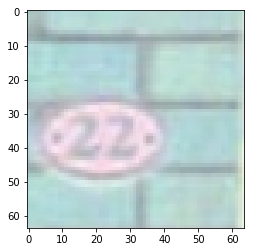

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


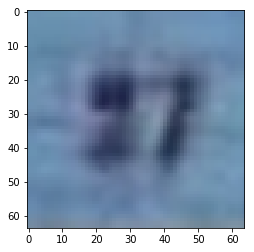

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


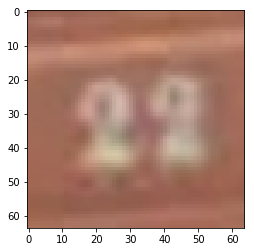

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


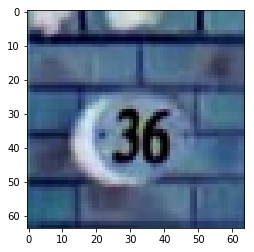

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


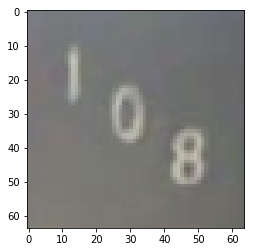

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


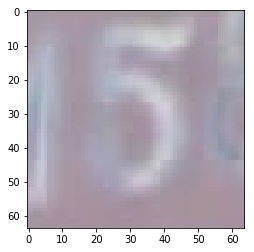

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


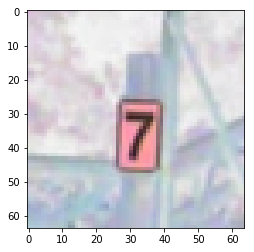

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


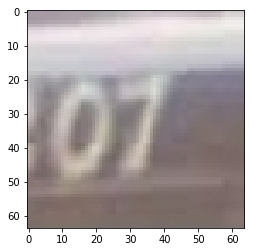

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


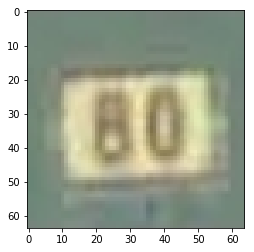

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


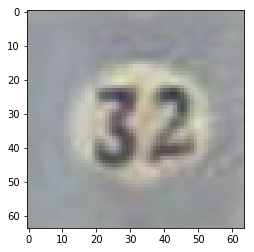

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


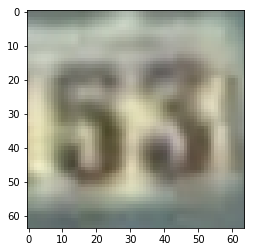

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


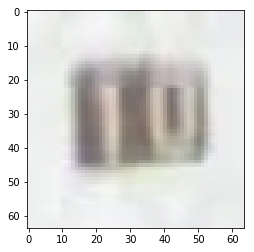

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


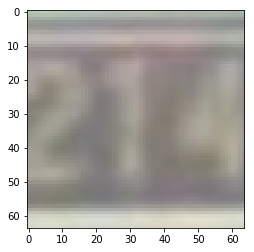

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


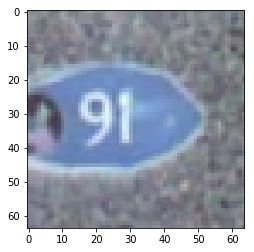

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


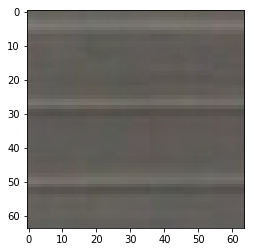

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


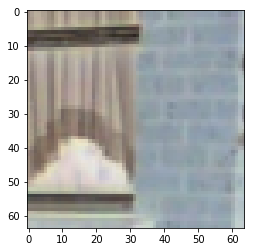

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


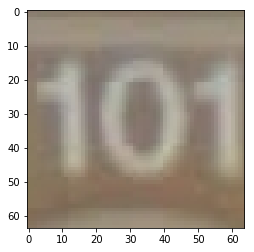

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


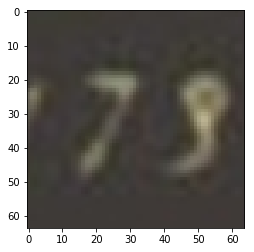

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


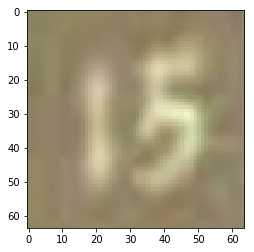

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


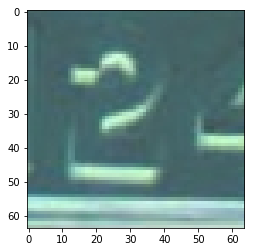

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


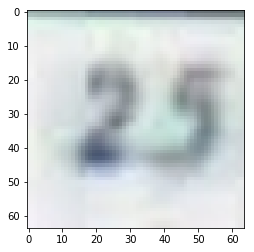

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


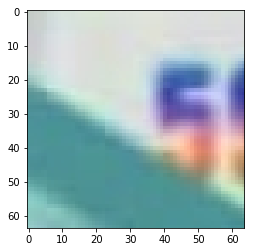

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


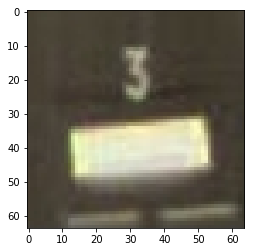

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


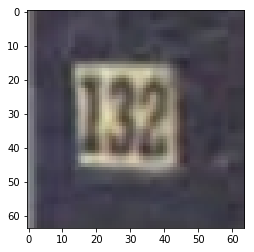

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


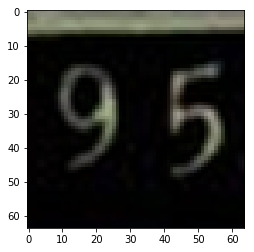

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


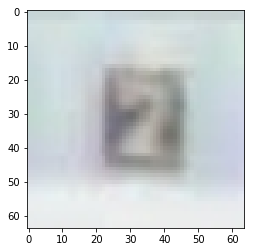

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


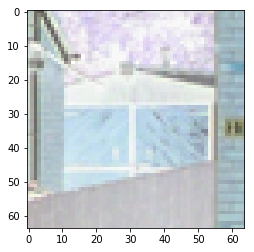

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


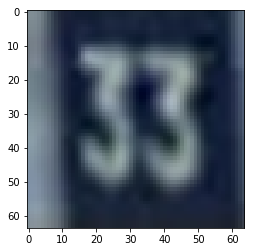

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


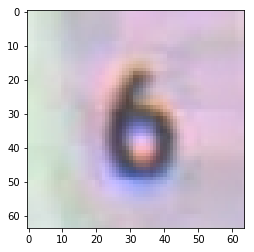

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


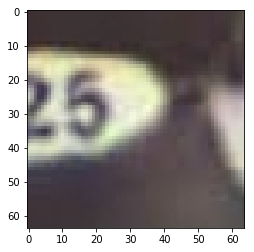

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


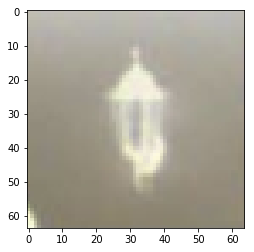

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


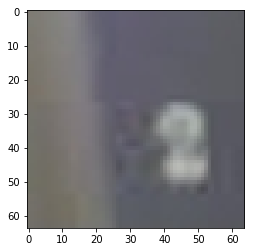

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


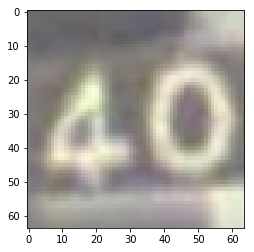

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


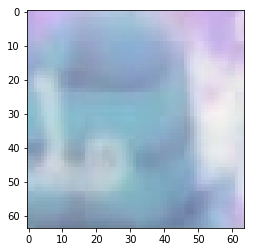

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


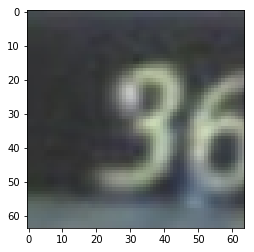

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


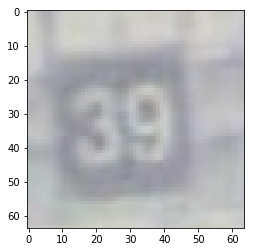

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


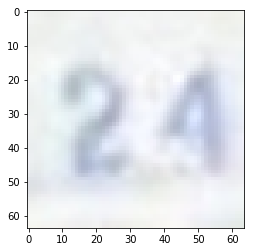

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


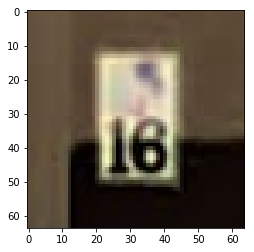

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


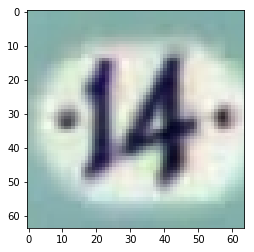

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


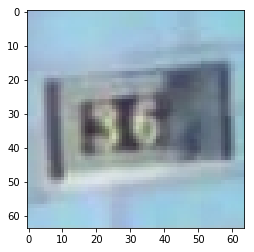

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


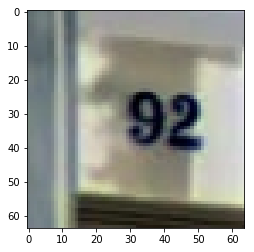

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


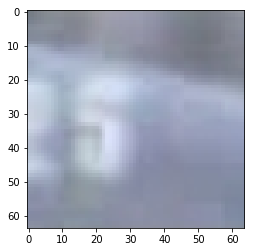

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


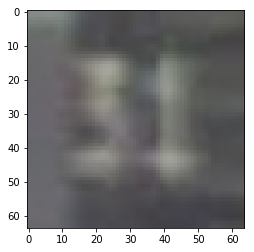

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


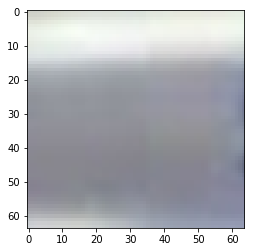

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


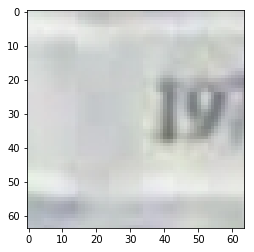

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


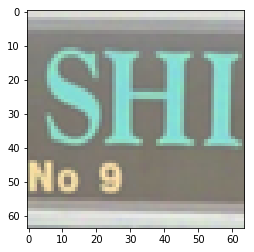

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


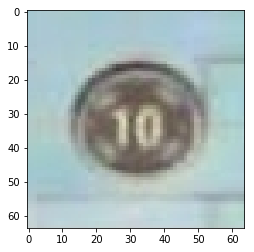

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


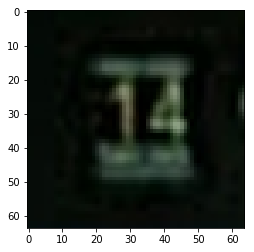

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


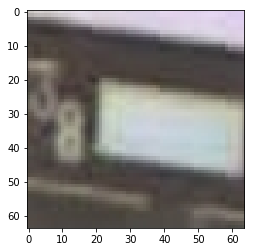

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


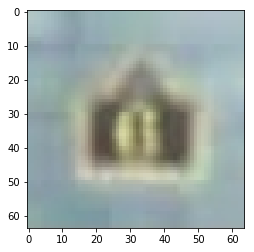

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


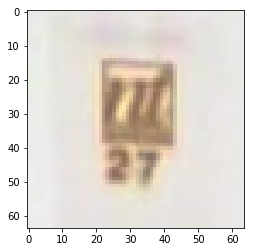

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


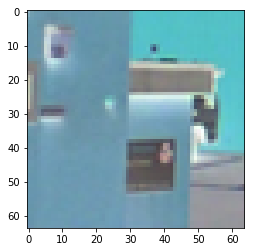

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


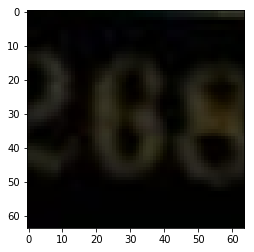

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


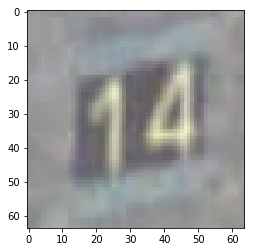

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


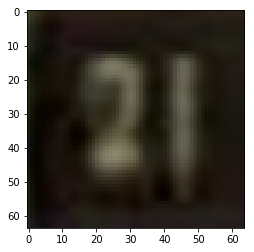

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


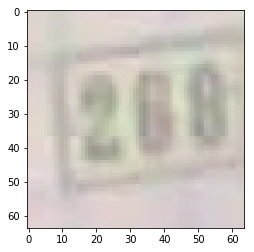

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


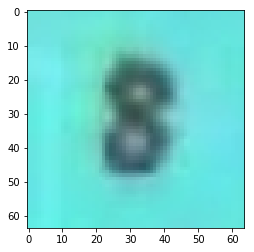

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


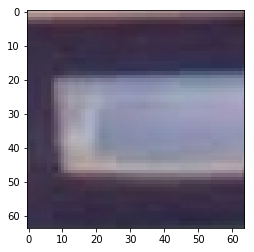

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


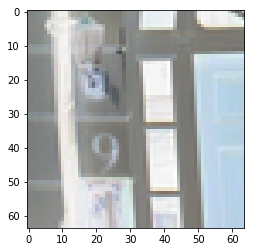

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


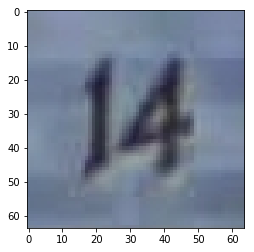

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


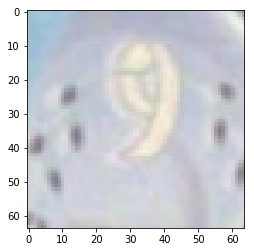

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


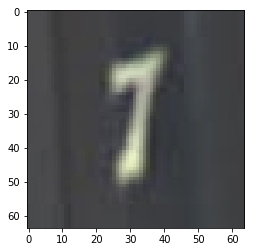

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


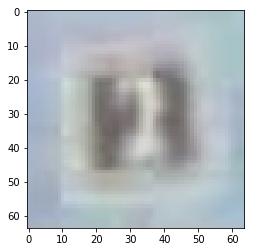

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


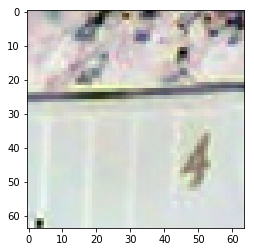

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


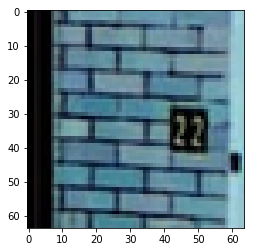

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


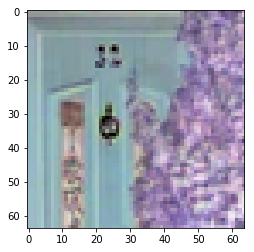

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


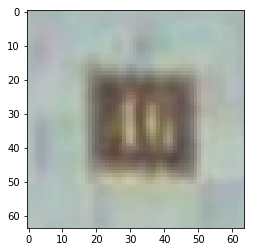

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


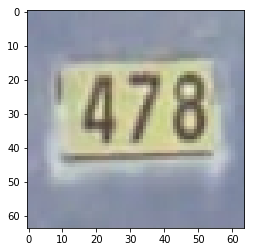

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


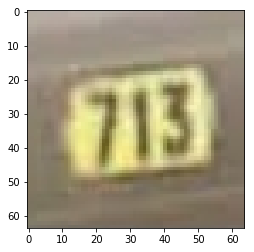

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


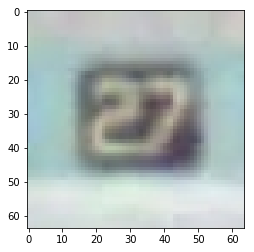

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


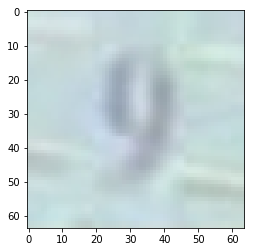

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


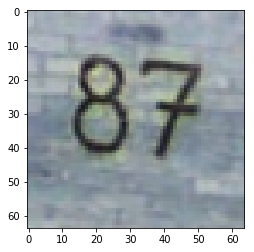

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


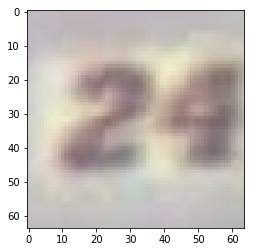

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


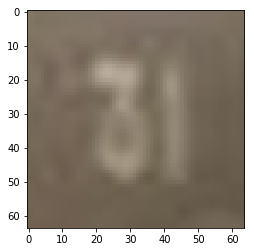

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


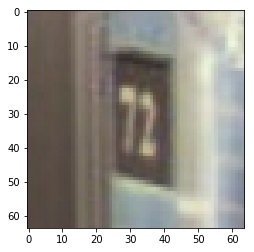

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


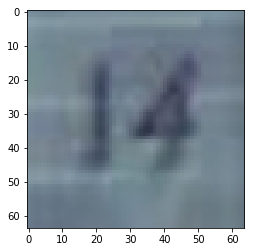

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


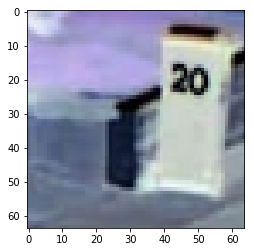

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


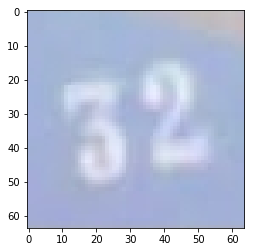

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


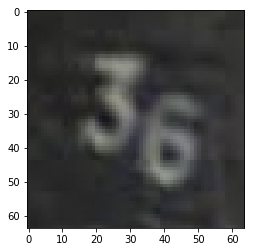

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


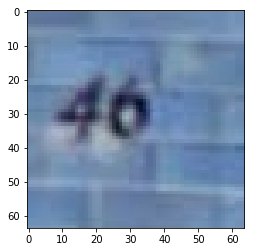

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


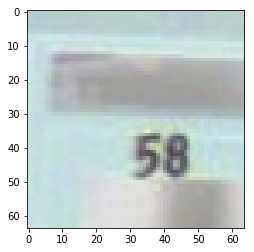

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


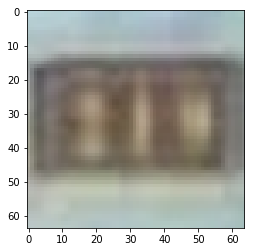

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


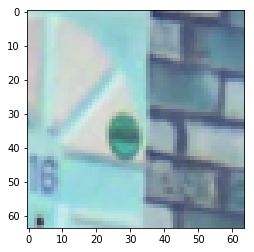

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


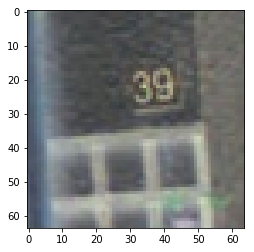

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


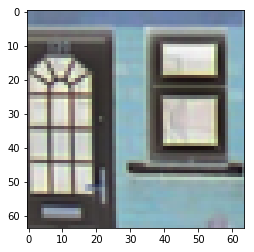

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


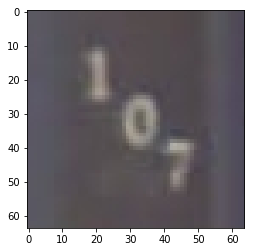

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


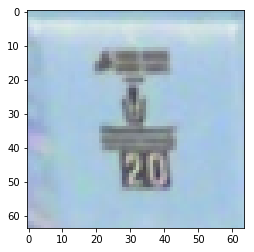

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


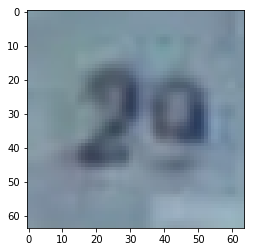

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


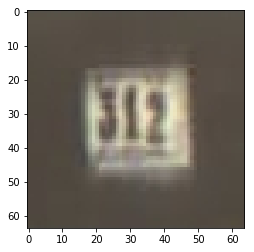

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


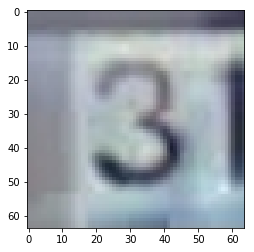

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


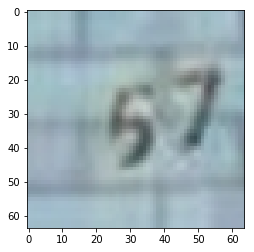

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


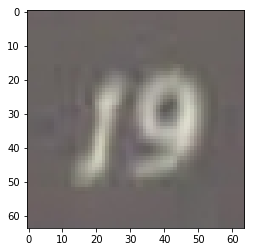

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


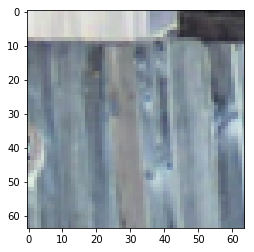

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


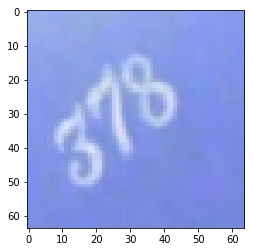

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


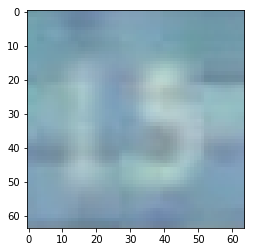

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


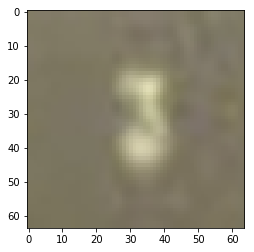

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


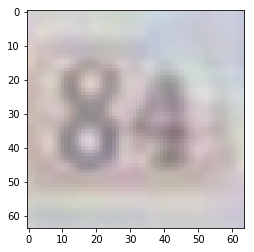

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


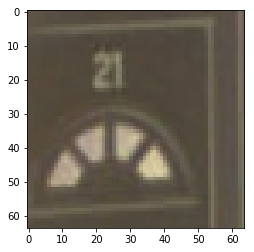

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


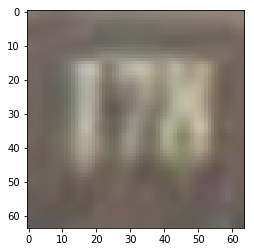

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


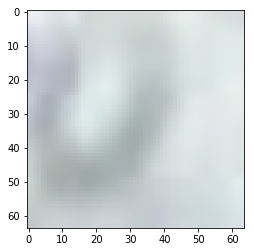

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


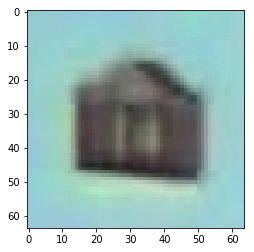

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


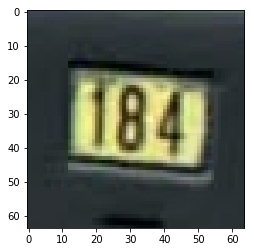

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


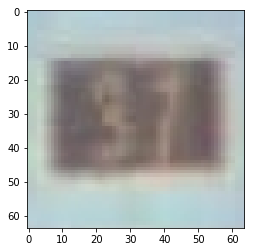

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


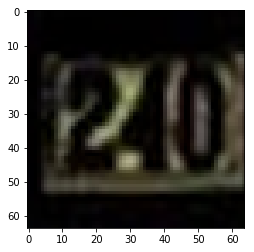

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


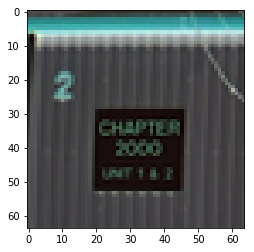

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


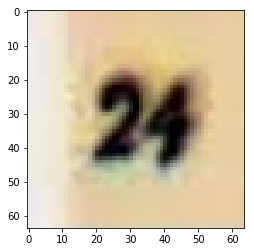

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


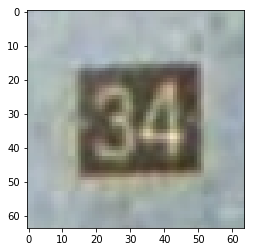

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


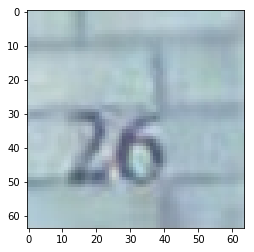

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


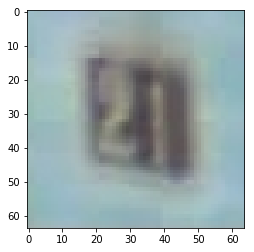

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


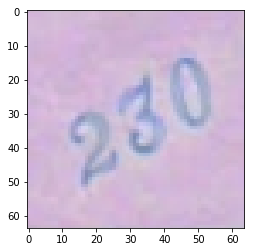

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


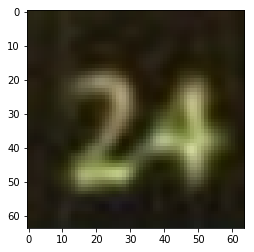

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


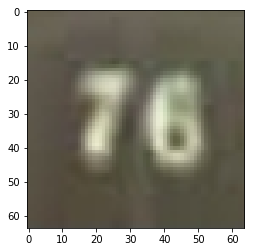

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


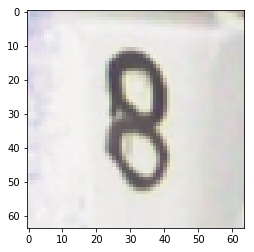

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


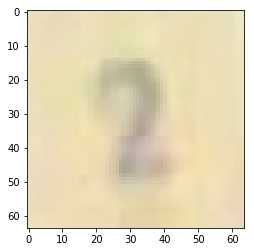

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


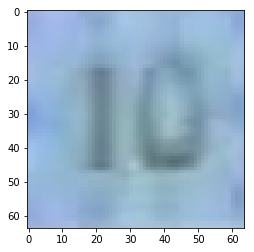

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


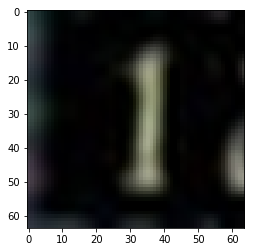

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


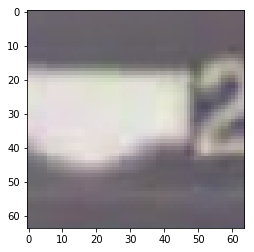

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


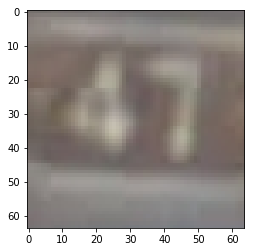

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


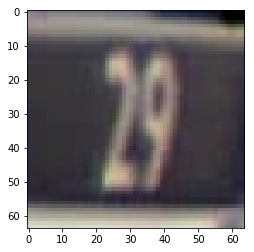

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


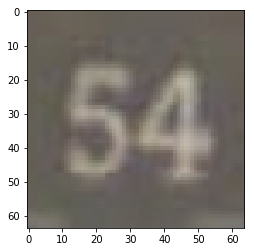

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


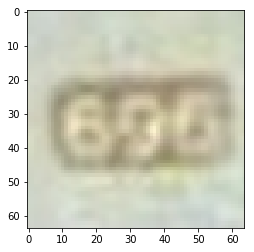

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


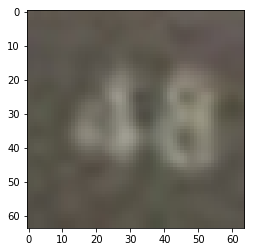

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


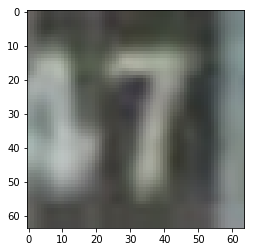

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


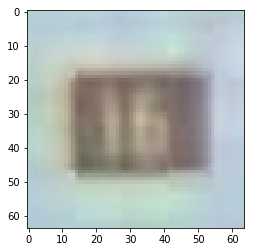

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


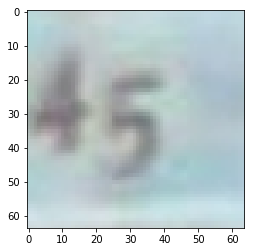

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


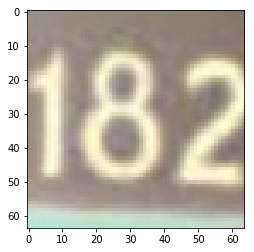

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


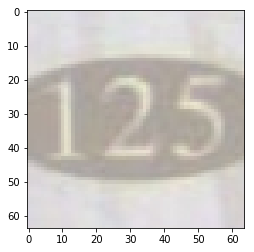

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


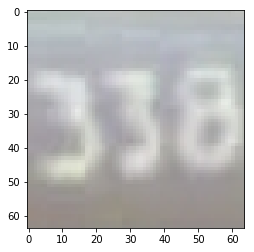

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


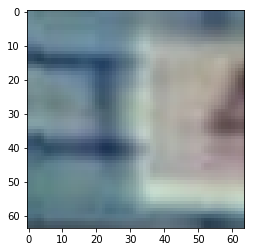

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


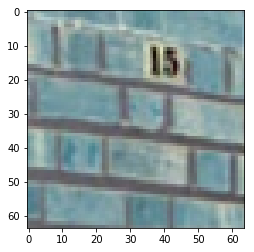

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


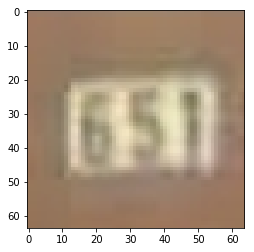

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


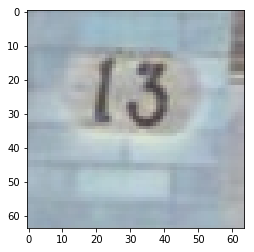

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


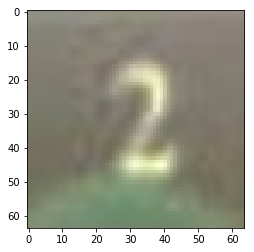

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


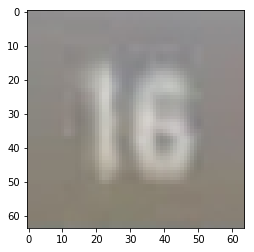

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


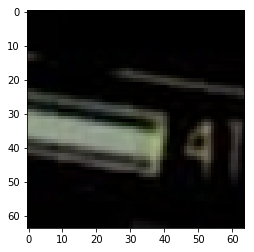

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


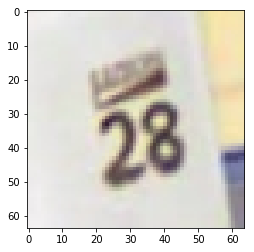

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


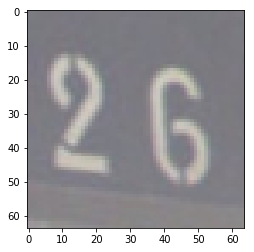

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


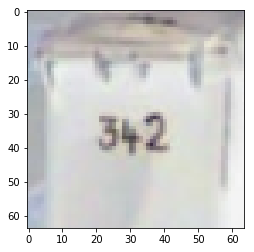

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


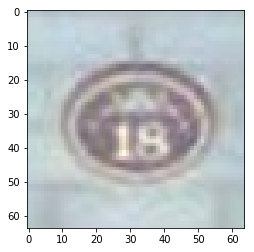

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


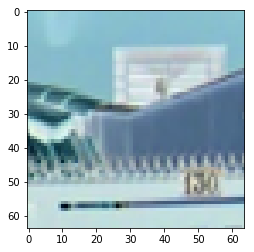

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


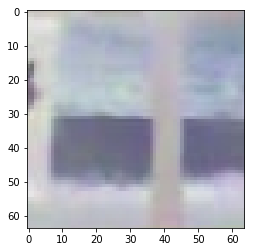

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


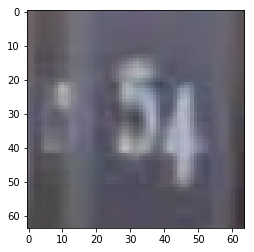

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


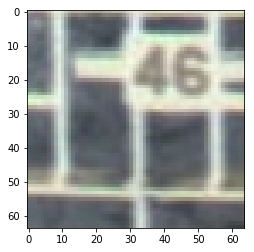

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


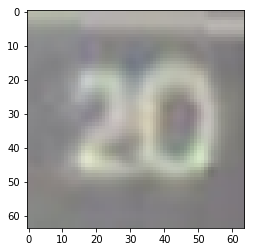

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


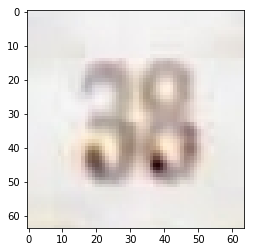

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


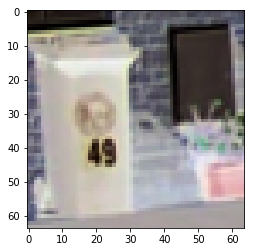

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


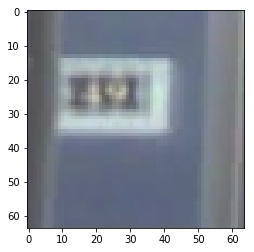

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


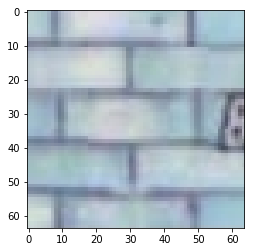

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


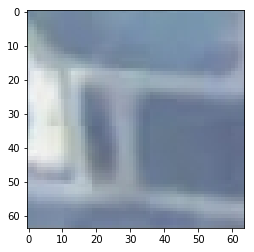

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


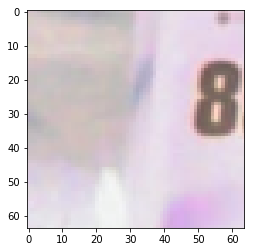

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


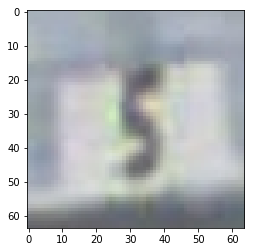

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


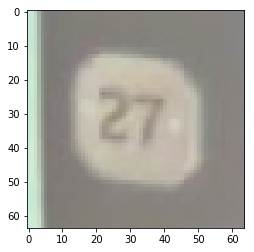

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


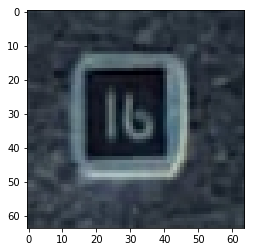

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


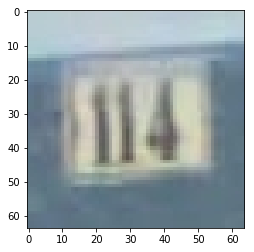

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


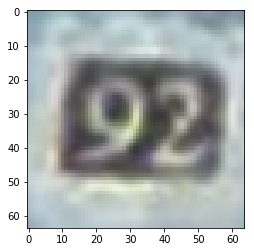

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


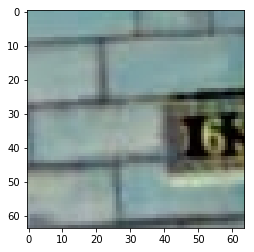

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


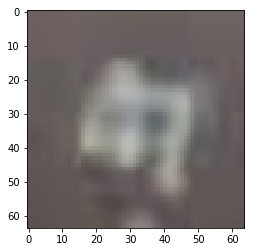

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


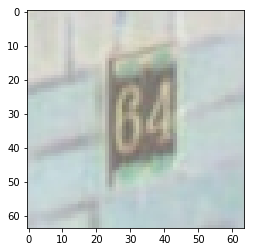

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


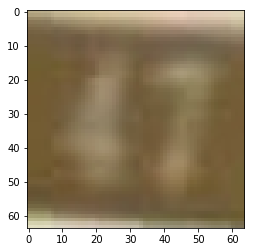

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


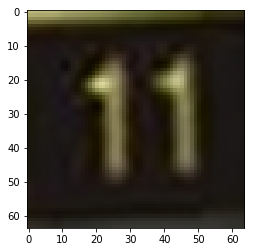

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


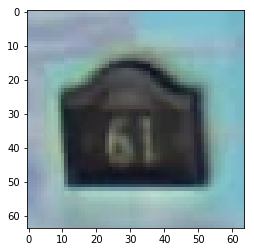

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


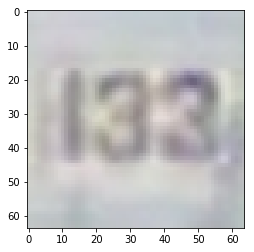

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


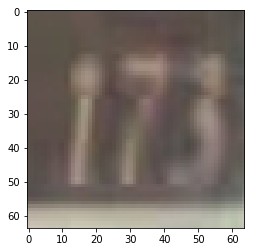

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


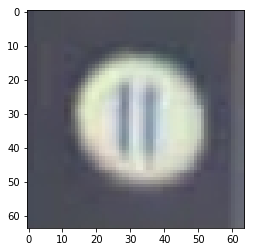

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


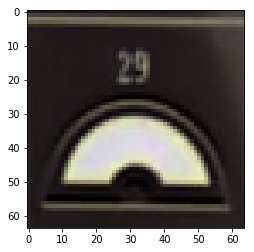

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


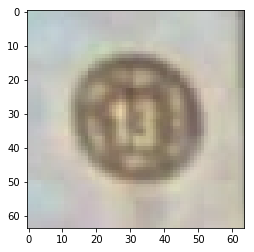

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


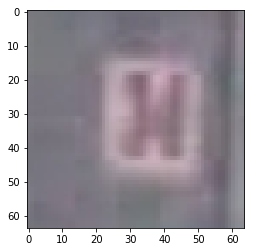

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


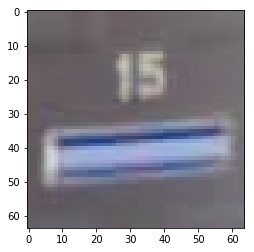

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


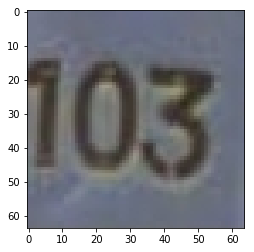

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


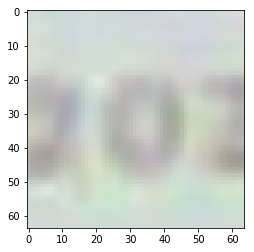

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


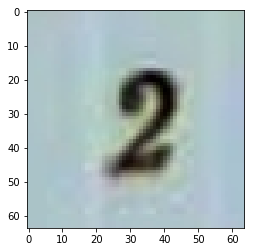

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


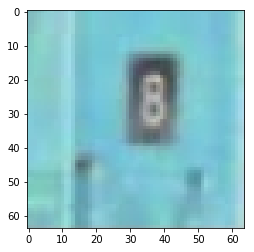

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


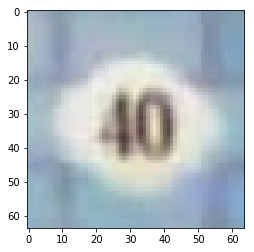

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


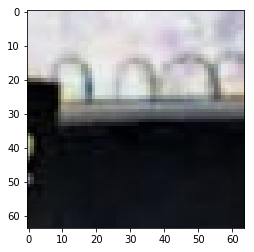

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


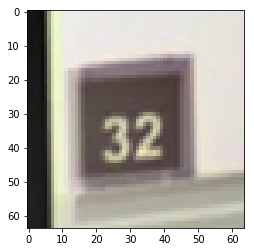

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


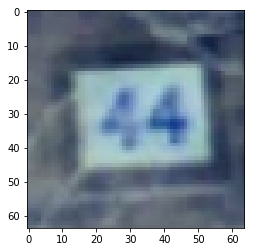

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


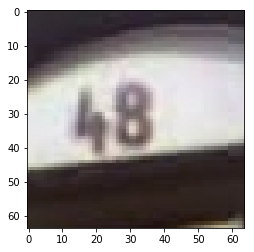

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


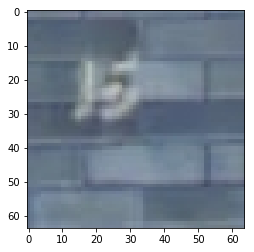

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


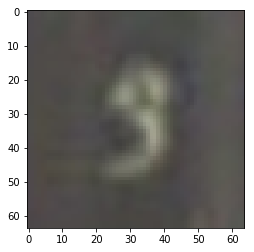

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


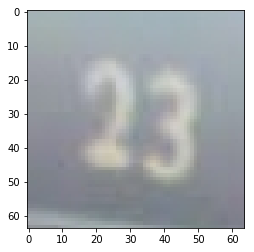

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


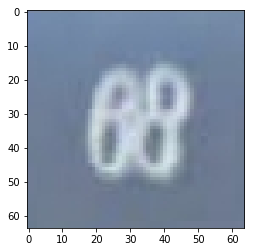

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


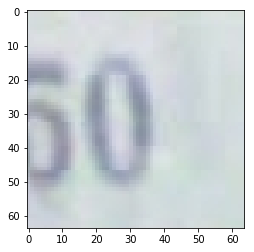

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


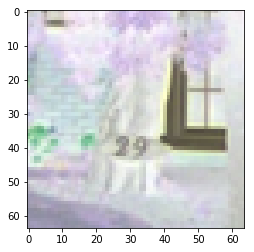

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


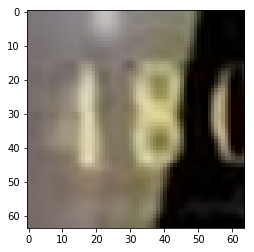

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


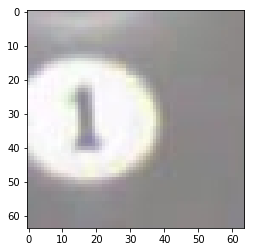

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


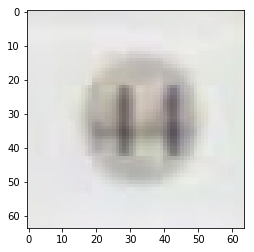

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


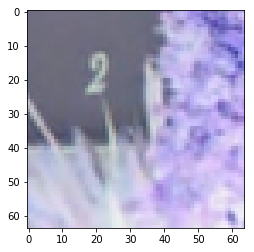

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


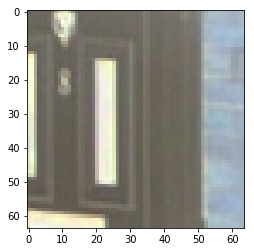

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


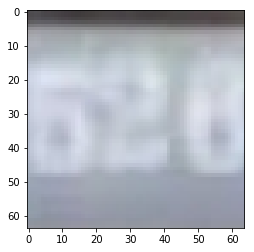

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


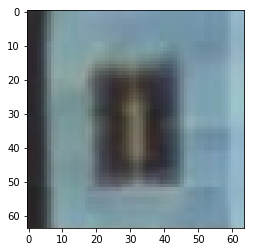

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


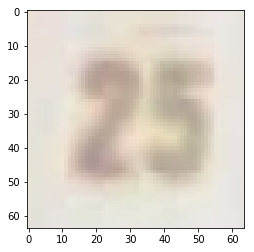

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


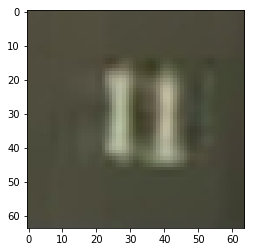

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


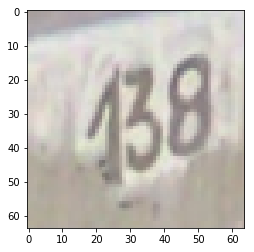

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


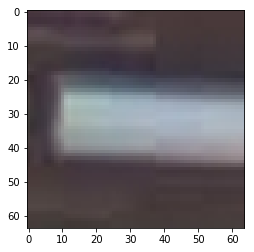

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


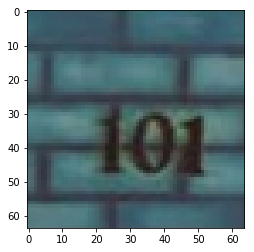

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


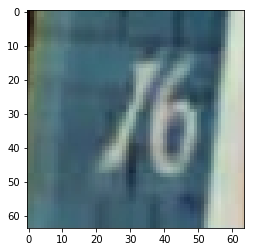

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


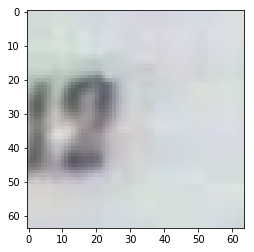

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


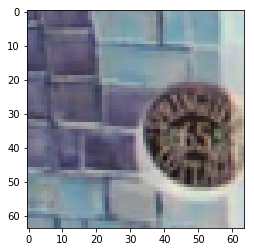

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


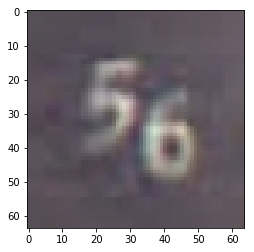

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


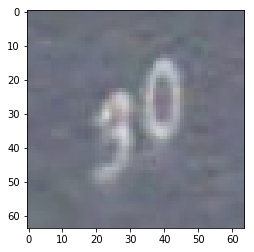

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


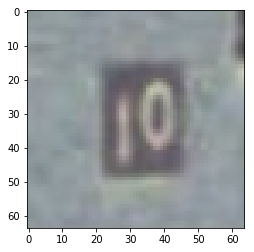

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


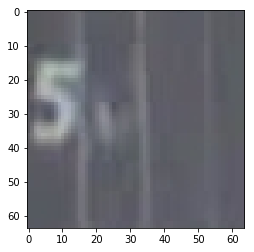

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


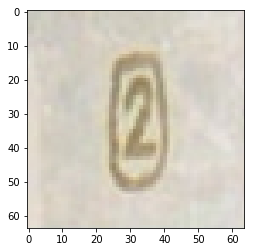

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


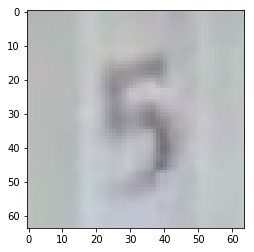

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


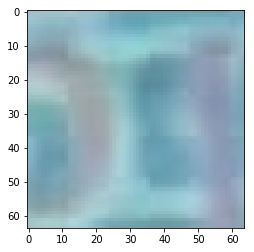

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


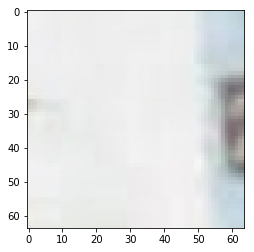

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


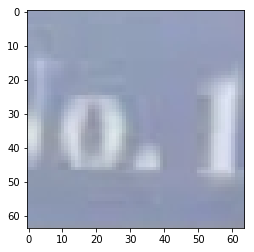

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


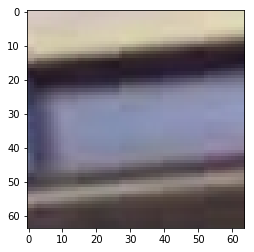

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


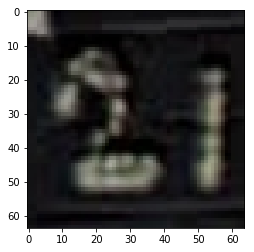

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


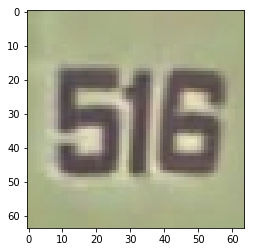

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


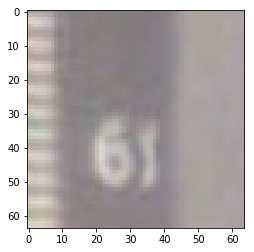

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


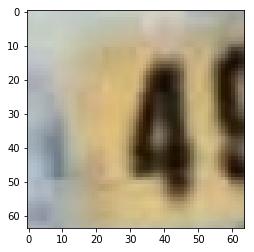

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


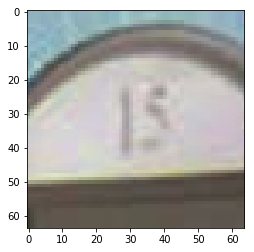

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


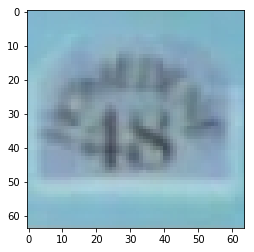

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


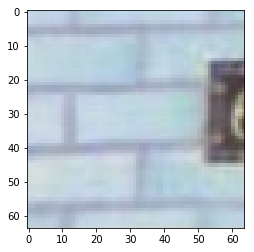

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


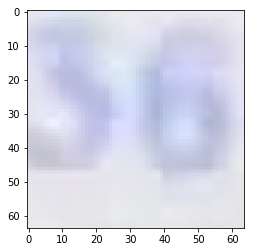

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


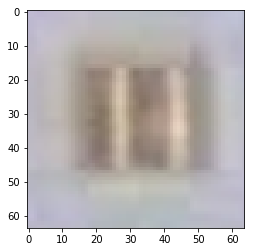

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


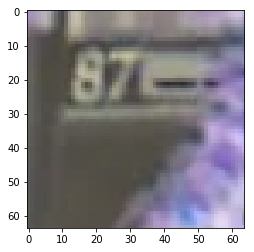

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


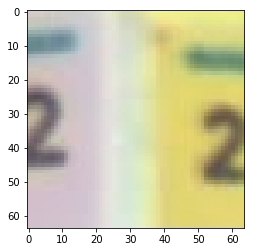

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


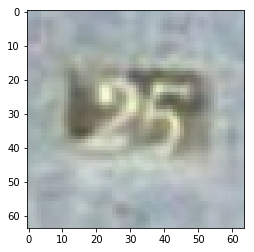

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


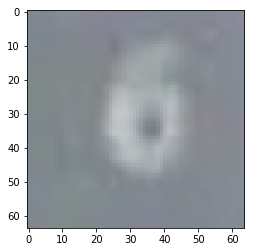

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


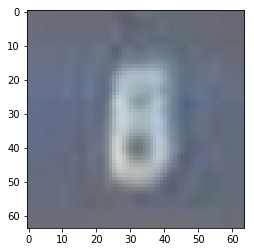

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


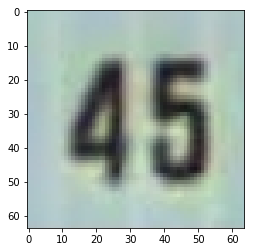

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


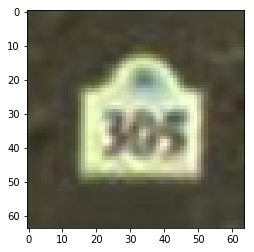

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


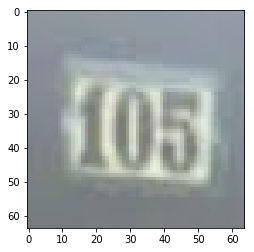

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


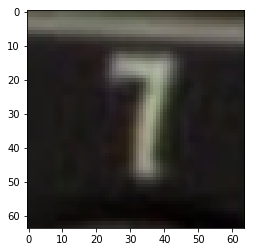

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


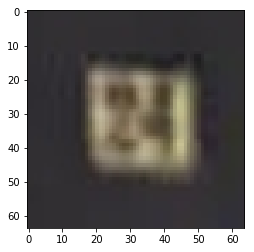

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


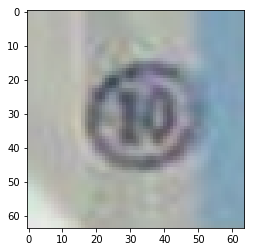

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


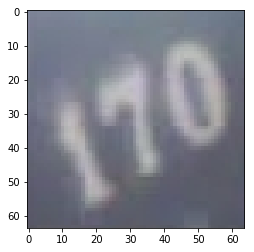

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


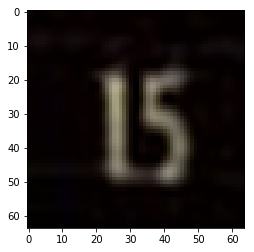

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


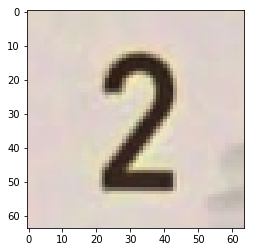

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


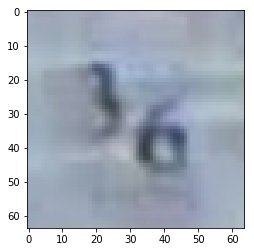

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


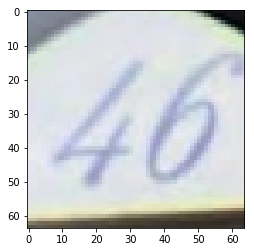

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


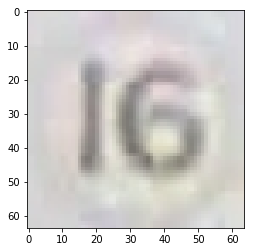

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


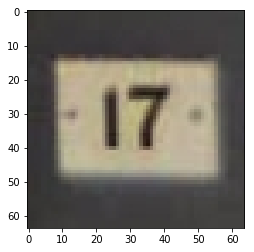

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


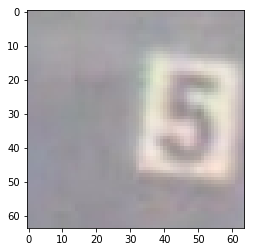

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


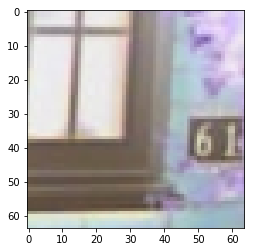

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


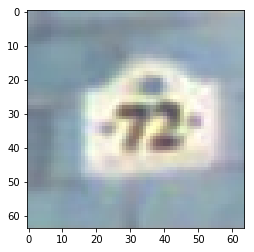

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


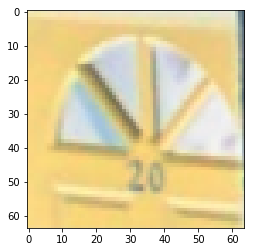

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


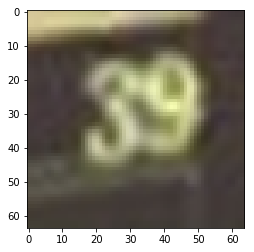

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


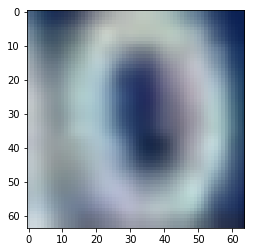

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


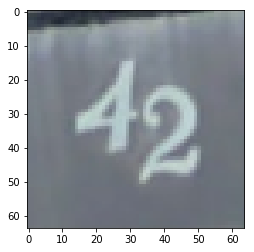

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


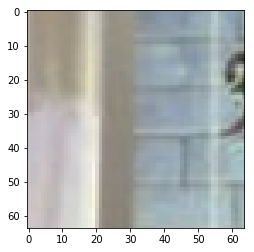

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


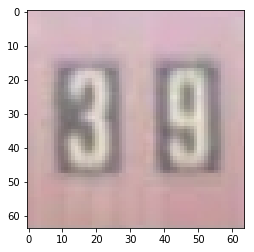

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


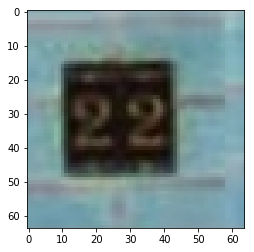

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


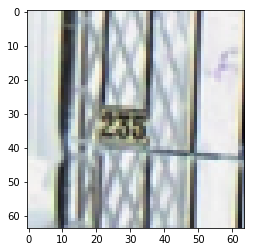

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


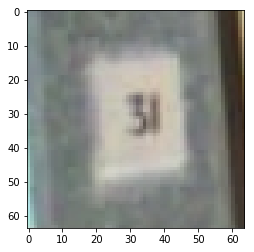

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


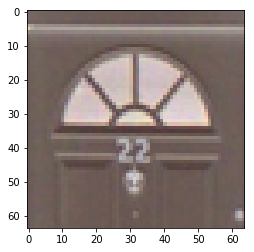

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


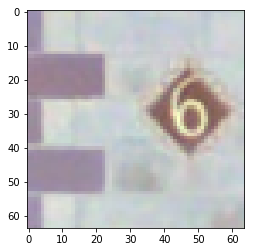

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


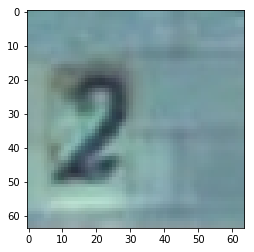

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


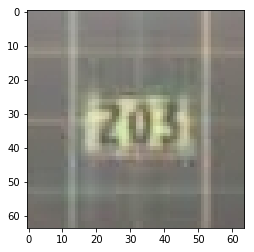

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


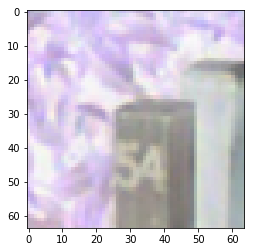

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


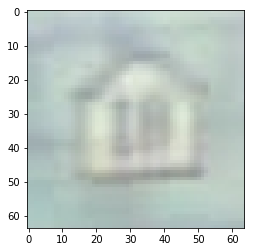

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


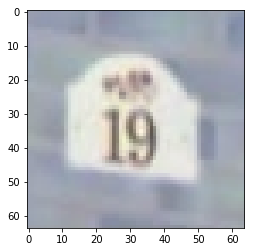

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


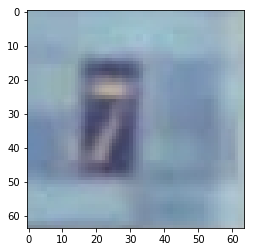

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


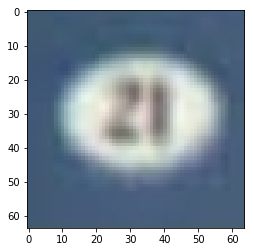

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


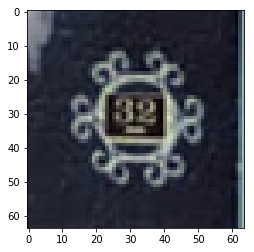

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


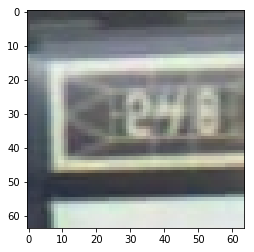

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


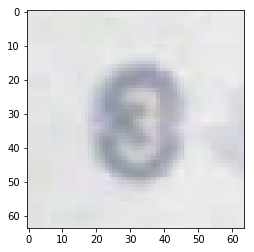

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


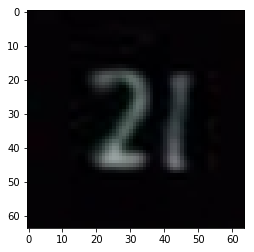

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


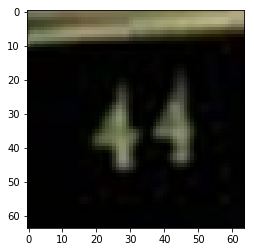

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


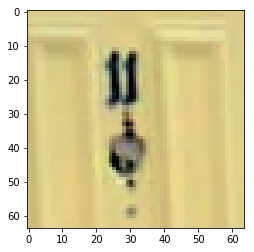

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


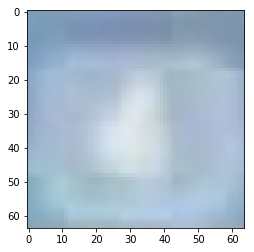

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


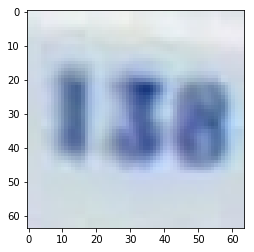

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


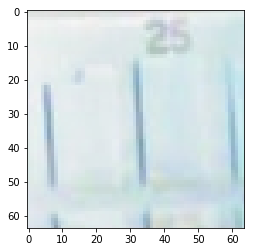

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


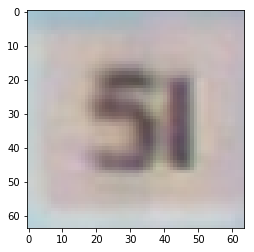

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


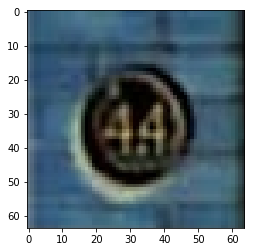

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


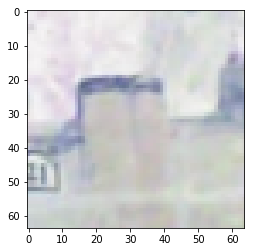

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


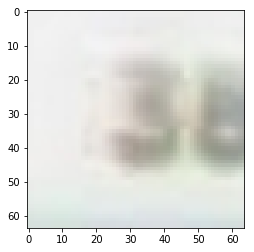

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


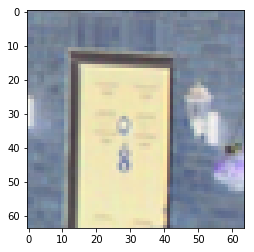

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


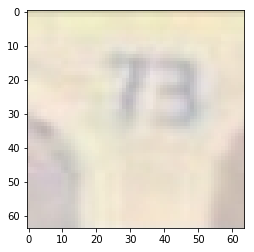

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


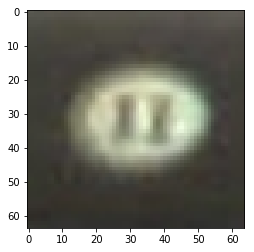

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


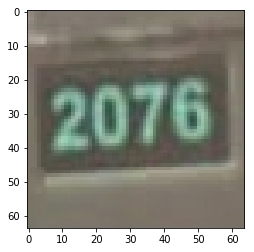

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


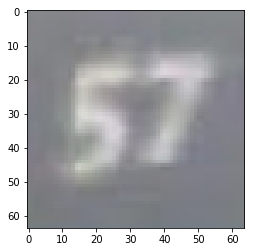

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


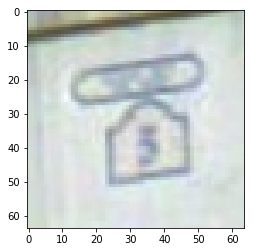

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


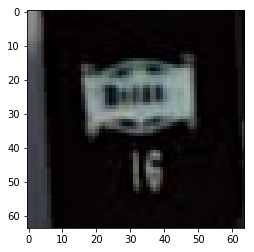

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


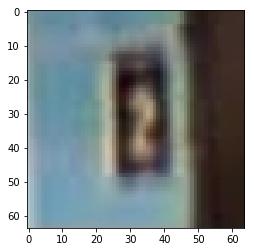

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


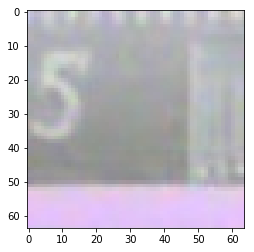

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


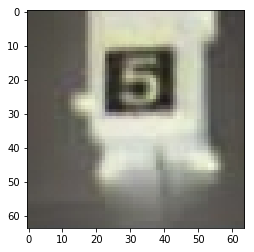

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


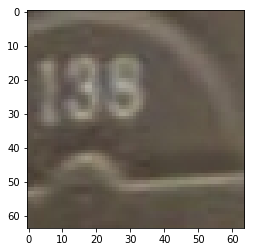

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


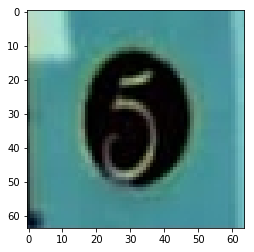

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


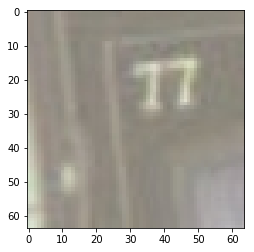

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


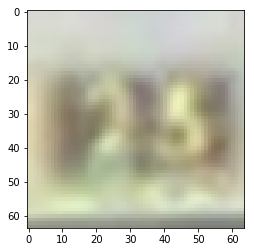

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


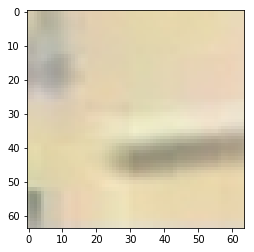

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


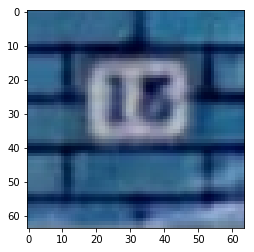

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


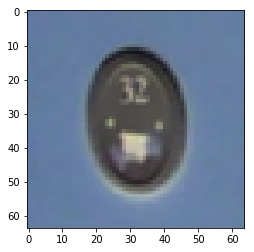

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


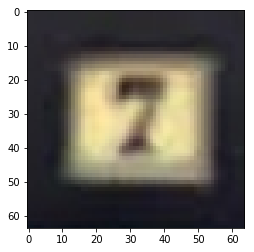

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


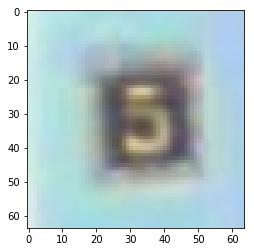

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


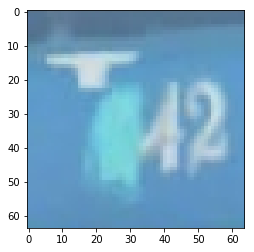

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


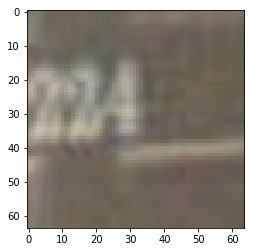

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


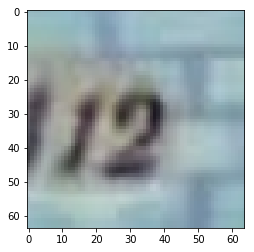

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


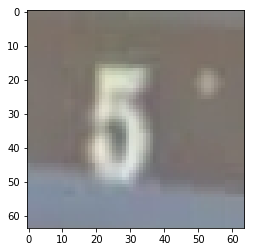

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


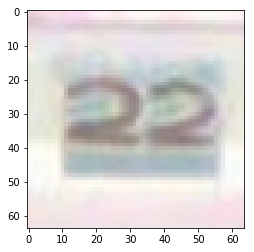

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


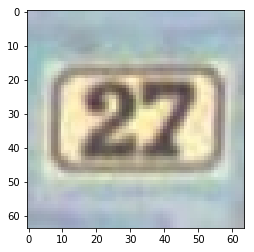

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


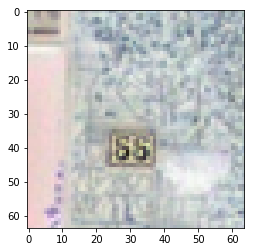

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


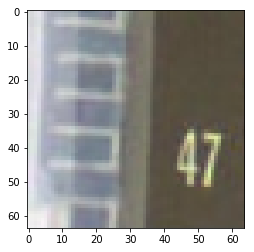

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


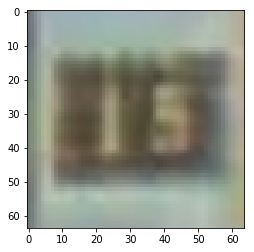

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


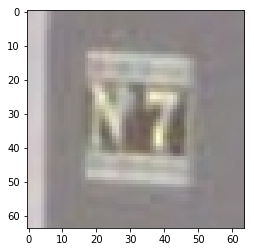

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


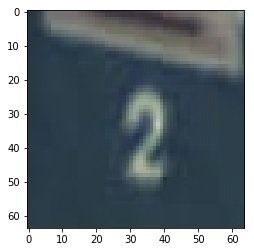

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


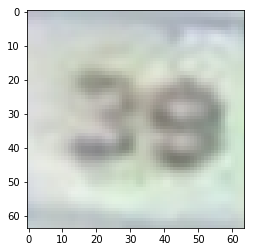

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


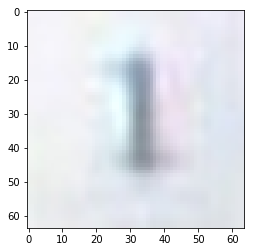

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


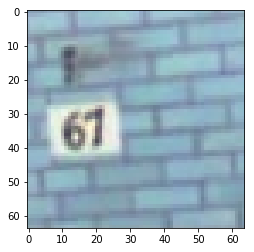

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


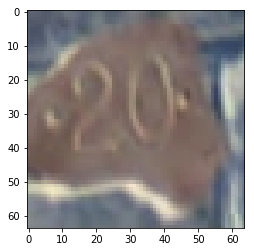

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


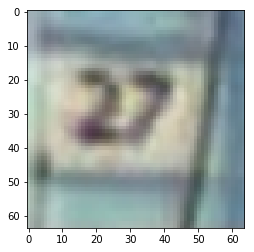

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


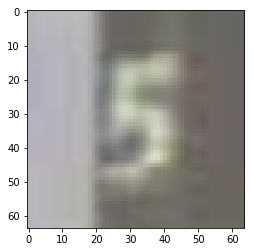

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


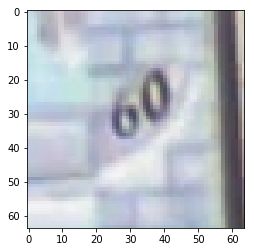

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


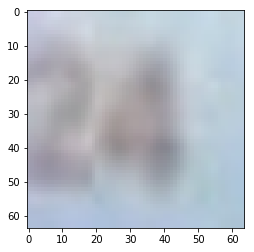

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


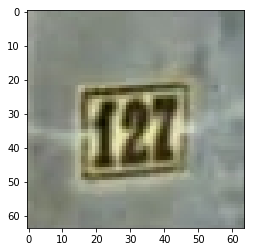

BEST PREDICTION IS: 3
-------------------Attemped resize img------------------------------


In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import glob

WEIGHT_FILE = "regression.ckpt"
image_list = []
saved_model_weights = WEIGHTS_FILE

saver = tf.train.Saver()
with tf.Session() as session:
    saver.restore(session, "regression.ckpt")
    for filename in glob.glob('data/svhn/full/test/*.png'):
        print("==================================================================================================")
        print("==================================================================================================")
        im=Image.open(filename)
        image_list.append(im)
        prediction, test_img = detect_multi(im, saved_model_weights,session)
        plt.figure()
        imgplot = plt.imshow(test_img)
        plt.show()
        print("BEST PREDICTION IS:", prediction)
        print("==================================================================================================")
        print("==================================================================================================")